In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("cancer_classification.csv")

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


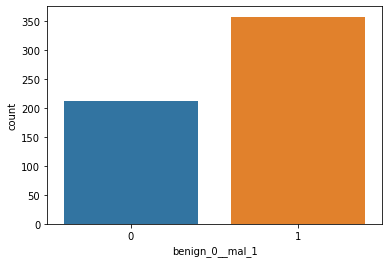

In [9]:
sns.countplot(x='benign_0__mal_1',data=df)

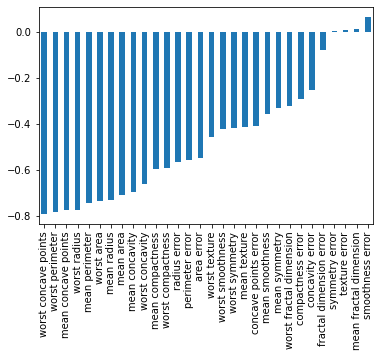

In [12]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [13]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=.25,random_state=101)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [22]:
X_train.shape

(426, 30)

In [23]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [24]:
model.fit(x=X_train,y=y_train, epochs=600,validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6965 - val_loss: 0.6798
Epoch 2/600
426/426 [==============================] - 0s 204us/sample - loss: 0.6711 - val_loss: 0.6583
Epoch 3/600
426/426 [==============================] - 0s 194us/sample - loss: 0.6410 - val_loss: 0.6231
Epoch 4/600
426/426 [==============================] - 0s 229us/sample - loss: 0.6026 - val_loss: 0.5821
Epoch 5/600
426/426 [==============================] - 0s 210us/sample - loss: 0.5616 - val_loss: 0.5394
Epoch 6/600
426/426 [==============================] - 0s 209us/sample - loss: 0.5193 - val_loss: 0.4948
Epoch 7/600
426/426 [==============================] - 0s 210us/sample - loss: 0.4741 - val_loss: 0.4495
Epoch 8/600
426/426 [==============================] - 0s 191us/sample - loss: 0.4324 - val_loss: 0.4067
Epoch 9/600
426/426 [==============================] - 0s 200us/sample - loss: 0.3930 - val_loss: 0.3672
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 198us/sample - loss: 0.0600 - val_loss: 0.1195
Epoch 79/600
426/426 [==============================] - 0s 185us/sample - loss: 0.0572 - val_loss: 0.1224
Epoch 80/600
426/426 [==============================] - 0s 198us/sample - loss: 0.0582 - val_loss: 0.1200
Epoch 81/600
426/426 [==============================] - 0s 189us/sample - loss: 0.0570 - val_loss: 0.1213
Epoch 82/600
426/426 [==============================] - 0s 196us/sample - loss: 0.0563 - val_loss: 0.1207
Epoch 83/600
426/426 [==============================] - 0s 224us/sample - loss: 0.0571 - val_loss: 0.1193
Epoch 84/600
426/426 [==============================] - 0s 305us/sample - loss: 0.0603 - val_loss: 0.1272
Epoch 85/600
426/426 [==============================] - 0s 212us/sample - loss: 0.0567 - val_loss: 0.1220
Epoch 86/600
426/426 [==============================] - 0s 199us/sample - loss: 0.0558 - val_loss: 0.1258
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 182us/sample - loss: 0.0482 - val_loss: 0.1529
Epoch 156/600
426/426 [==============================] - 0s 166us/sample - loss: 0.0458 - val_loss: 0.1473
Epoch 157/600
426/426 [==============================] - 0s 174us/sample - loss: 0.0465 - val_loss: 0.1503
Epoch 158/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0449 - val_loss: 0.1475
Epoch 159/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0461 - val_loss: 0.1536
Epoch 160/600
426/426 [==============================] - 0s 184us/sample - loss: 0.0440 - val_loss: 0.1493
Epoch 161/600
426/426 [==============================] - 0s 172us/sample - loss: 0.0447 - val_loss: 0.1538
Epoch 162/600
426/426 [==============================] - 0s 166us/sample - loss: 0.0467 - val_loss: 0.1484
Epoch 163/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0450 - val_loss: 0.1596
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 177us/sample - loss: 0.0332 - val_loss: 0.2115
Epoch 308/600
426/426 [==============================] - 0s 168us/sample - loss: 0.0355 - val_loss: 0.2074
Epoch 309/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0328 - val_loss: 0.2002
Epoch 310/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0329 - val_loss: 0.2061
Epoch 311/600
426/426 [==============================] - 0s 175us/sample - loss: 0.0332 - val_loss: 0.1984
Epoch 312/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0336 - val_loss: 0.2008
Epoch 313/600
426/426 [==============================] - 0s 165us/sample - loss: 0.0364 - val_loss: 0.2032
Epoch 314/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0335 - val_loss: 0.2047
Epoch 315/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0339 - val_loss: 0.2088
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 185us/sample - loss: 0.0286 - val_loss: 0.2698
Epoch 460/600
426/426 [==============================] - 0s 165us/sample - loss: 0.0272 - val_loss: 0.2583
Epoch 461/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0254 - val_loss: 0.2774
Epoch 462/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0279 - val_loss: 0.2588
Epoch 463/600
426/426 [==============================] - 0s 170us/sample - loss: 0.0274 - val_loss: 0.2699
Epoch 464/600
426/426 [==============================] - 0s 168us/sample - loss: 0.0291 - val_loss: 0.2630
Epoch 465/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0260 - val_loss: 0.2628
Epoch 466/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0261 - val_loss: 0.2613
Epoch 467/600
426/426 [==============================] - 0s 158us/sample - loss: 0.0262 - val_loss: 0.2721
Epoch 468/600
426/426 [============================

In [25]:
losses= pd.DataFrame(model.history.history)

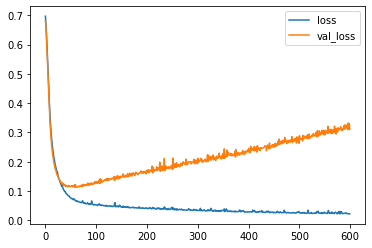

In [26]:
losses.plot()

In [27]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [30]:
early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=25)

In [31]:
model.fit(x=X_train,y=y_train, epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6672 - val_loss: 0.6489
Epoch 2/600
426/426 [==============================] - 0s 201us/sample - loss: 0.6189 - val_loss: 0.6045
Epoch 3/600
426/426 [==============================] - 0s 252us/sample - loss: 0.5752 - val_loss: 0.5588
Epoch 4/600
426/426 [==============================] - 0s 229us/sample - loss: 0.5304 - val_loss: 0.5127
Epoch 5/600
426/426 [==============================] - 0s 201us/sample - loss: 0.4850 - val_loss: 0.4635
Epoch 6/600
426/426 [==============================] - 0s 209us/sample - loss: 0.4423 - val_loss: 0.4180
Epoch 7/600
426/426 [==============================] - 0s 224us/sample - loss: 0.4023 - val_loss: 0.3767
Epoch 8/600
426/426 [==============================] - 0s 263us/sample - loss: 0.3645 - val_loss: 0.3437
Epoch 9/600
426/426 [==============================] - 0s 218us/sample - loss: 0.3349 - val_loss: 0.3121
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 201us/sample - loss: 0.0557 - val_loss: 0.1042
Epoch 00078: early stopping


In [32]:
model_loss = pd.DataFrame(model.history.history)

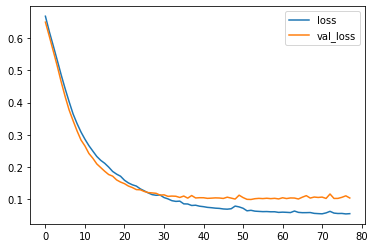

In [33]:
model_loss.plot()

In [34]:
from tensorflow.keras.layers import Dropout

In [36]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [37]:
model.fit(x=X_train,y=y_train, epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.7153 - val_loss: 0.6717
Epoch 2/600
426/426 [==============================] - 0s 224us/sample - loss: 0.6854 - val_loss: 0.6477
Epoch 3/600
426/426 [==============================] - 0s 222us/sample - loss: 0.6504 - val_loss: 0.6238
Epoch 4/600
426/426 [==============================] - 0s 218us/sample - loss: 0.6278 - val_loss: 0.5948
Epoch 5/600
426/426 [==============================] - 0s 226us/sample - loss: 0.5857 - val_loss: 0.5632
Epoch 6/600
426/426 [==============================] - 0s 243us/sample - loss: 0.5774 - val_loss: 0.5332
Epoch 7/600
426/426 [==============================] - 0s 221us/sample - loss: 0.5458 - val_loss: 0.4998
Epoch 8/600
426/426 [==============================] - 0s 216us/sample - loss: 0.5195 - val_loss: 0.4642
Epoch 9/600
426/426 [==============================] - 0s 219us/sample - loss: 0.5049 - val_loss: 0.4302
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 232us/sample - loss: 0.1298 - val_loss: 0.0942
Epoch 79/600
426/426 [==============================] - 0s 223us/sample - loss: 0.1029 - val_loss: 0.0923
Epoch 80/600
426/426 [==============================] - 0s 231us/sample - loss: 0.1081 - val_loss: 0.0992
Epoch 81/600
426/426 [==============================] - 0s 214us/sample - loss: 0.1147 - val_loss: 0.0968
Epoch 82/600
426/426 [==============================] - 0s 203us/sample - loss: 0.1320 - val_loss: 0.0984
Epoch 83/600
426/426 [==============================] - 0s 204us/sample - loss: 0.1066 - val_loss: 0.0982
Epoch 84/600
426/426 [==============================] - 0s 206us/sample - loss: 0.1042 - val_loss: 0.0961
Epoch 85/600
426/426 [==============================] - 0s 218us/sample - loss: 0.1110 - val_loss: 0.1131
Epoch 86/600
426/426 [==============================] - 0s 204us/sample - loss: 0.1171 - val_loss: 0.1019
Epoch 87/600
426/426 [========================

In [38]:
model_loss = pd.DataFrame(model.history.history)

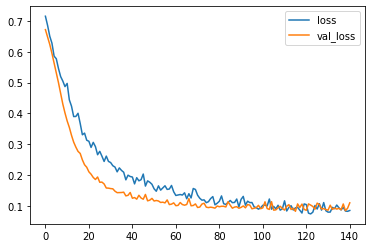

In [39]:
model_loss.plot()

In [41]:
predictions = model.predict_classes(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [44]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 4 84]]
